### 데이터 확인 및 전처리

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기 및 확인
df = pd.read_csv('/content/Advertising Budget and Sales.csv', index_col=0)
X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = df['Sales ($)']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
# 이상치 제거 전 통계량 확인
df.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


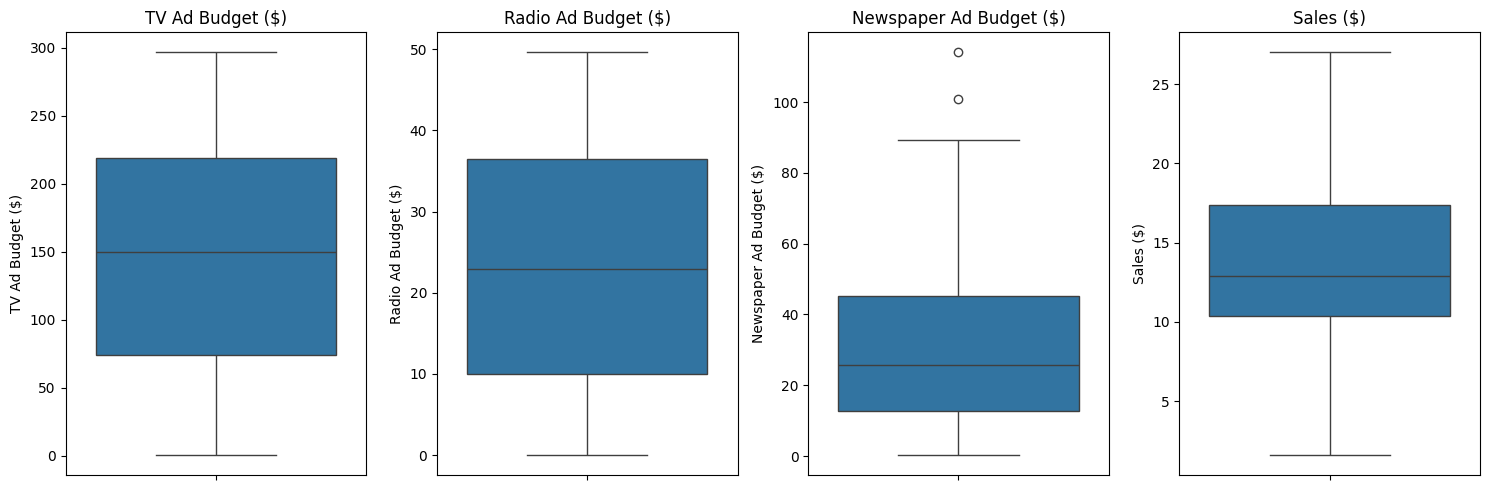

In [ ]:
# 박스플롯 이상치 확인
plt.figure(figsize=(15, 5))

for i, column in enumerate(df.columns, 1):
  plt.subplot(1, len(df.columns), i)
  sns.boxplot(y=df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

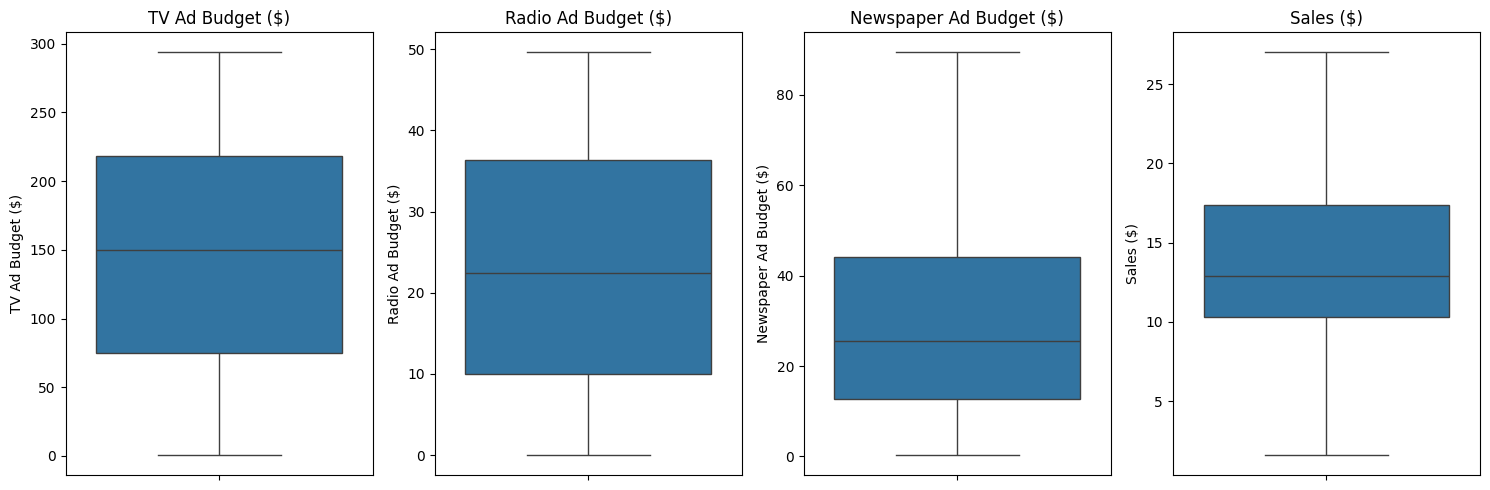

In [ ]:
# 이상치 제거
def clean(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns = df.columns
df = clean(df, columns=columns)

# 박스플롯 이상치 재확인
plt.figure(figsize=(15, 5))

for i, column in enumerate(df.columns, 1):
  plt.subplot(1, len(df.columns), i)
  sns.boxplot(y=df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

### 탐색적 데이터 분석

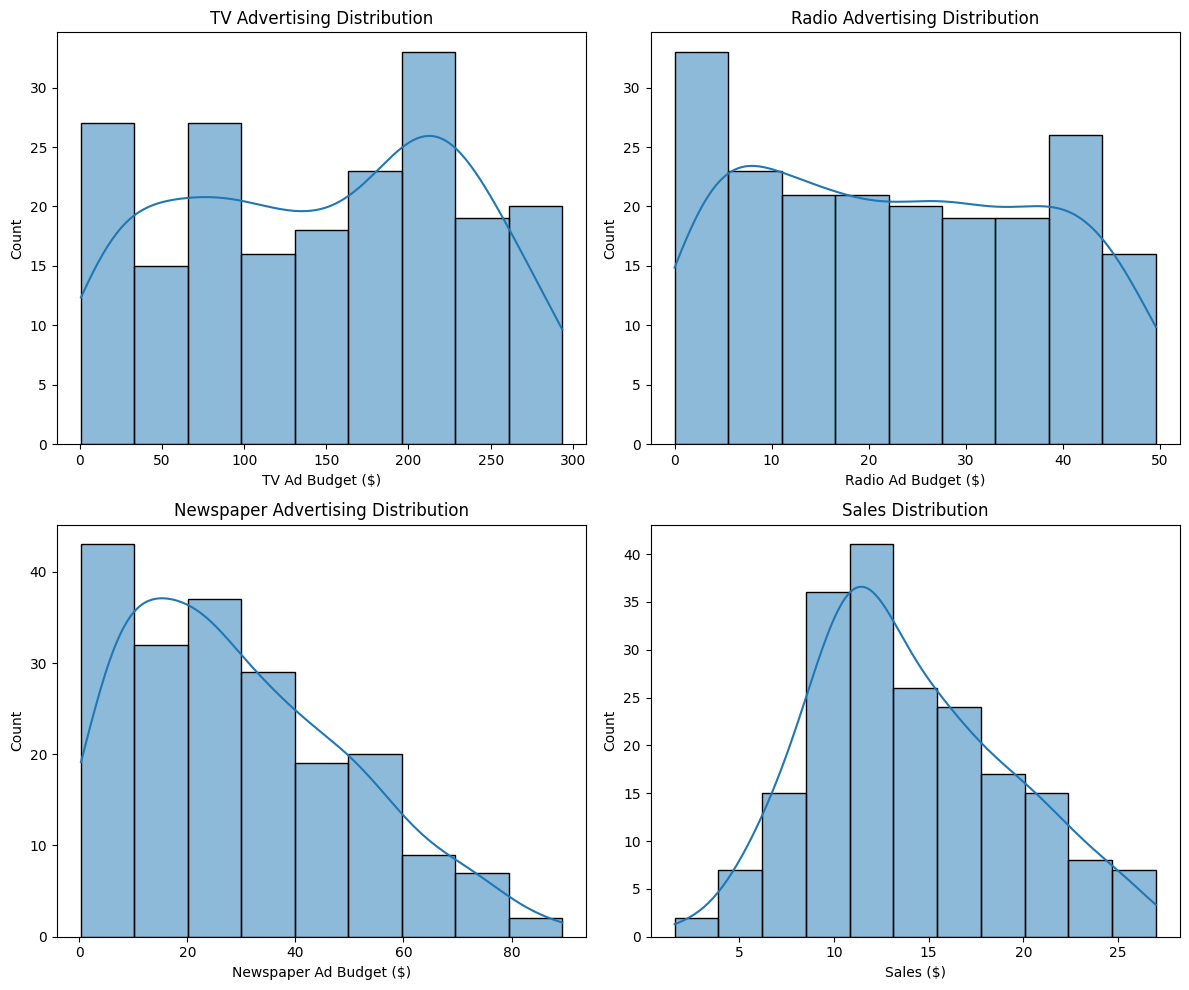

In [ ]:
# 각 변수의 분포 시각화 확인
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['TV Ad Budget ($)'], kde=True, ax=axes[0, 0]).set(title="TV Advertising Distribution")
sns.histplot(df['Radio Ad Budget ($)'], kde=True, ax=axes[0, 1]).set(title="Radio Advertising Distribution")
sns.histplot(df['Newspaper Ad Budget ($)'], kde=True, ax=axes[1, 0]).set(title="Newspaper Advertising Distribution")
sns.histplot(df['Sales ($)'], kde=True, ax=axes[1, 1]).set(title="Sales Distribution")
plt.tight_layout()
plt.show()

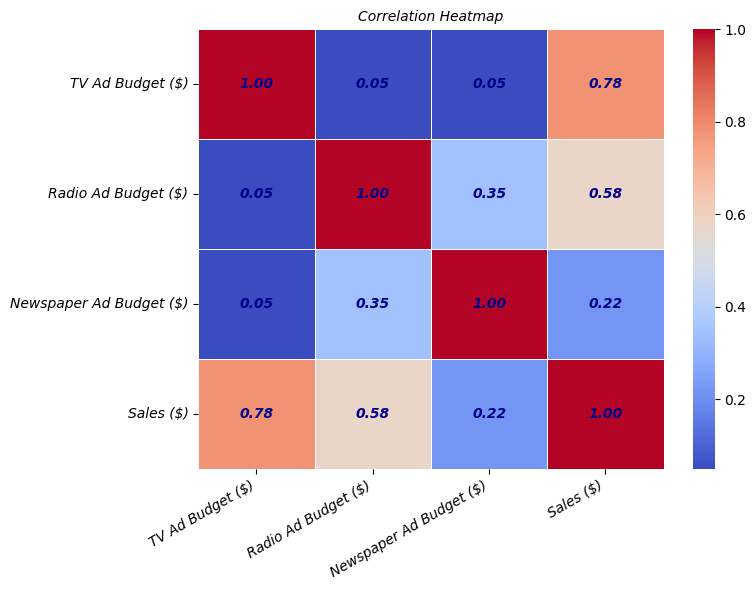

In [ ]:
# 상관관계 계산
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    annot_kws={"style": "italic",
               "fontsize": 10,
               "color": "darkblue",
               "weight": "bold"}
)

plt.xticks(rotation=30, ha='right', style='italic', fontsize=10)
plt.yticks(rotation=0, style='italic', fontsize=10)

plt.title('Correlation Heatmap', style='italic', fontsize=10)
plt.tight_layout()
plt.show()

### 수요 예측 모델링

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# --------------------------------------------------------------------
# 선형 회귀(Linear Regression) 학습 및 평가
# --------------------------------------------------------------------
from sklearn.linear_model import LinearRegression

# 학습
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 평가
lr_score = lr_model.score(X_test_scaled, y_test)
lr_mse = mean_squared_error(y_test, lr_model.predict(X_test_scaled))
lr_mae = mean_absolute_error(y_test, lr_model.predict(X_test_scaled))
print('선형 회귀 R2: {0:.3f}'.format(lr_score))
print('선형 회귀 MSE: {0:.3f}'.format(lr_mse))
print('선형 회귀 MAE: {0:.3f}'.format(lr_mae))

선형 회귀 R2: 0.907
선형 회귀 MSE: 2.906
선형 회귀 MAE: 1.232


In [ ]:
# --------------------------------------------------------------------
# 의사결정트리(DecisionTree) 학습 및 평가
# --------------------------------------------------------------------
from sklearn.tree import DecisionTreeRegressor

# 학습
tree_model = DecisionTreeRegressor(random_state=1234)
tree_model.fit(X_train_scaled, y_train)

# 평가
tree_score = tree_model.score(X_test_scaled, y_test)
tree_mse = mean_squared_error(y_test, tree_model.predict(X_test_scaled))
tree_mae = mean_absolute_error(y_test, tree_model.predict(X_test_scaled))
print('의사결정 트리 R2: {0:.3f}'.format(tree_score))
print('의사결정 트리 MSE: {0:.3f}'.format(tree_mse))
print('의사결정 트리 MAE: {0:.3f}'.format(tree_mae))

의사결정 트리 R2: 0.942
의사결정 트리 MSE: 1.834
의사결정 트리 MAE: 1.005


In [ ]:
# --------------------------------------------------------------------
# 랜덤 포레스트(Random Forest) 학습 및 평가
# --------------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor

# 학습
forest_model = RandomForestRegressor(random_state=1234)
forest_model.fit(X_train_scaled, y_train)

# 평가
forest_score = forest_model.score(X_test_scaled, y_test)
forest_mse = mean_squared_error(y_test, forest_model.predict(X_test_scaled))
forest_mae = mean_absolute_error(y_test, forest_model.predict(X_test_scaled))
print('랜덤 포레스트 R2: {0:.3f}'.format(forest_score))
print('랜덤 포레스트 MSE: {0:.3f}'.format(forest_mse))
print('랜덤 포레스트 MAE: {0:.3f}'.format(forest_mae))

랜덤 포레스트 R2: 0.982
랜덤 포레스트 MSE: 0.579
랜덤 포레스트 MAE: 0.642


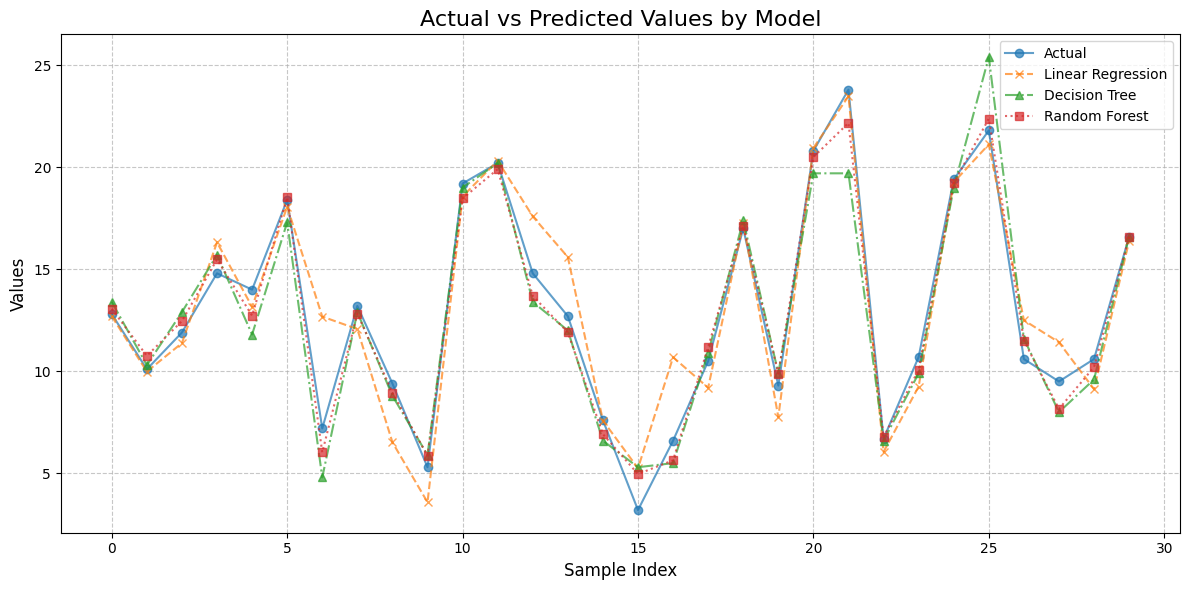

In [ ]:
# 예측값 계산
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_tree = tree_model.predict(X_test_scaled)
y_pred_forest = forest_model.predict(X_test_scaled)

# 샘플 30개로 제한
y_test_sample = y_test.values[:30]
y_pred_lr_sample = y_pred_lr[:30]
y_pred_tree_sample = y_pred_tree[:30]
y_pred_forest_sample = y_pred_forest[:30]

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test_sample, label="Actual", marker='o', alpha=0.7)
plt.plot(y_pred_lr_sample, label="Linear Regression", marker='x', linestyle='--', alpha=0.7)
plt.plot(y_pred_tree_sample, label="Decision Tree", marker='^', linestyle='-.', alpha=0.7)
plt.plot(y_pred_forest_sample, label="Random Forest", marker='s', linestyle=':', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Values by Model", fontsize=16)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# --------------------------------------------------------------------
# 릿지 회귀(Ridge Regression) 학습 및 평가
# --------------------------------------------------------------------
from sklearn.linear_model import Ridge

# 초기화
ridge_model = Ridge()

# 하이퍼파라미터 설정
ridge_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

# 학습
gs_ridge = GridSearchCV(ridge_model, ridge_params, cv=5, n_jobs=-1)
gs_ridge.fit(X_train_scaled, y_train)

# 평가
best_ridge_model = gs_ridge.best_estimator_
ridge_score = best_ridge_model.score(X_test_scaled, y_test)
ridge_mse = mean_squared_error(y_test, best_ridge_model.predict(X_test_scaled))
ridge_mae = mean_absolute_error(y_test, best_ridge_model.predict(X_test_scaled))
print('릿지 최상의 매개변수:', gs_ridge.best_params_)
print('릿지 회귀 R2: {0:.3f}'.format(ridge_score))
print('릿지 회귀 MSE: {0:.3f}'.format(ridge_mse))
print('릿지 회귀 MAE: {0:.3f}'.format(ridge_mae))

릿지 최상의 매개변수: {'alpha': 1}
릿지 회귀 R2: 0.907
릿지 회귀 MSE: 2.906
릿지 회귀 MAE: 1.230


In [ ]:
# --------------------------------------------------------------------
# 의사결정트리(DecisonTree) 학습 및 평가
# --------------------------------------------------------------------
from sklearn.tree import DecisionTreeRegressor

# 초기화
tree_model = DecisionTreeRegressor(random_state=1234)

# 하이퍼파라미터 설정
tree_params = {'max_depth': [5, 10, 15, 20],
               'min_samples_split': [2, 5, 10, 15],
               'min_samples_leaf': [1, 2, 3, 5],
               'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.05]}

# 학습
gs_tree = GridSearchCV(tree_model, tree_params, cv=5, n_jobs=-1)
gs_tree.fit(X_train_scaled, y_train)

# 평가
best_tree_model = gs_tree.best_estimator_
tree_score = best_tree_model.score(X_test_scaled, y_test)
tree_mse = mean_squared_error(y_test, best_tree_model.predict(X_test_scaled))
tree_mae = mean_absolute_error(y_test, best_tree_model.predict(X_test_scaled))
print('의사결정 트리 최상의 매개변수:', gs_tree.best_params_)
print('의사결정 트리 R2: {0:.3f}'.format(tree_score))
print('의사결정 트리 MSE: {0:.3f}'.format(tree_mse))
print('의사결정 트리 MAE: {0:.3f}'.format(tree_mae))

의사결정 트리 최상의 매개변수: {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1, 'min_samples_split': 2}
의사결정 트리 R2: 0.943
의사결정 트리 MSE: 1.778
의사결정 트리 MAE: 1.019


In [ ]:
# --------------------------------------------------------------------
# 랜덤 포레스트(Random Forest) 학습 및 평가
# --------------------------------------------------------------------

# 초기화
forest_model = RandomForestRegressor(random_state=1234)

# 하이퍼파라미터 설정
forest_params = {'n_estimators': [100, 200, 300, 500],
                 'max_depth': [5, 10, 15, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 3],
                 'min_impurity_decrease': [0.0001, 0.001, 0.01]}

# 학습
gs_forest = GridSearchCV(forest_model, forest_params, cv=5, n_jobs=-1)
gs_forest.fit(X_train_scaled, y_train)

# 평가
best_forest_model = gs_forest.best_estimator_
forest_score = best_forest_model.score(X_test_scaled, y_test)
forest_mse = mean_squared_error(y_test, best_forest_model.predict(X_test_scaled))
forest_mae = mean_absolute_error(y_test, best_forest_model.predict(X_test_scaled))
print('랜덤 포레스트 최상의 매개변수:', gs_forest.best_params_)
print('랜덤 포레스트 R2: {0:.3f}'.format(forest_score))
print('랜덤 포레스트 MSE: {0:.3f}'.format(forest_mse))
print('랜덤 포레스트 MAE: {0:.3f}'.format(forest_mae))

랜덤 포레스트 최상의 매개변수: {'max_depth': 15, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
랜덤 포레스트 R2: 0.982
랜덤 포레스트 MSE: 0.575
랜덤 포레스트 MAE: 0.656


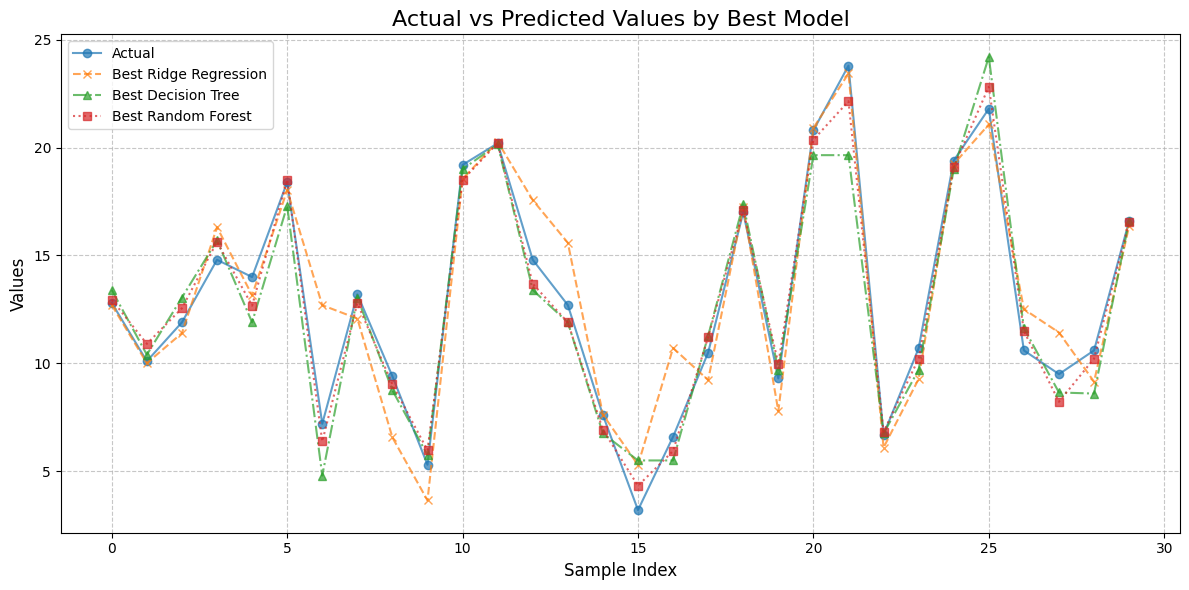

In [ ]:
# 예측값 계산
y_pred_best_ridge = best_ridge_model.predict(X_test_scaled)
y_pred_best_tree = best_tree_model.predict(X_test_scaled)
y_pred_best_forest = best_forest_model.predict(X_test_scaled)

# 샘플 30개로 제한
y_test_sample = y_test.values[:30]
y_pred_best_ridge_sample = y_pred_best_ridge[:30]
y_pred_best_tree_sample = y_pred_best_tree[:30]
y_pred_best_forest_sample = y_pred_best_forest[:30]

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test_sample, label="Actual", marker='o', alpha=0.7)
plt.plot(y_pred_best_ridge_sample, label="Best Ridge Regression", marker='x', linestyle='--', alpha=0.7)
plt.plot(y_pred_best_tree_sample, label="Best Decision Tree", marker='^', linestyle='-.', alpha=0.7)
plt.plot(y_pred_best_forest_sample, label="Best Random Forest", marker='s', linestyle=':', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Values by Best Model", fontsize=16)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

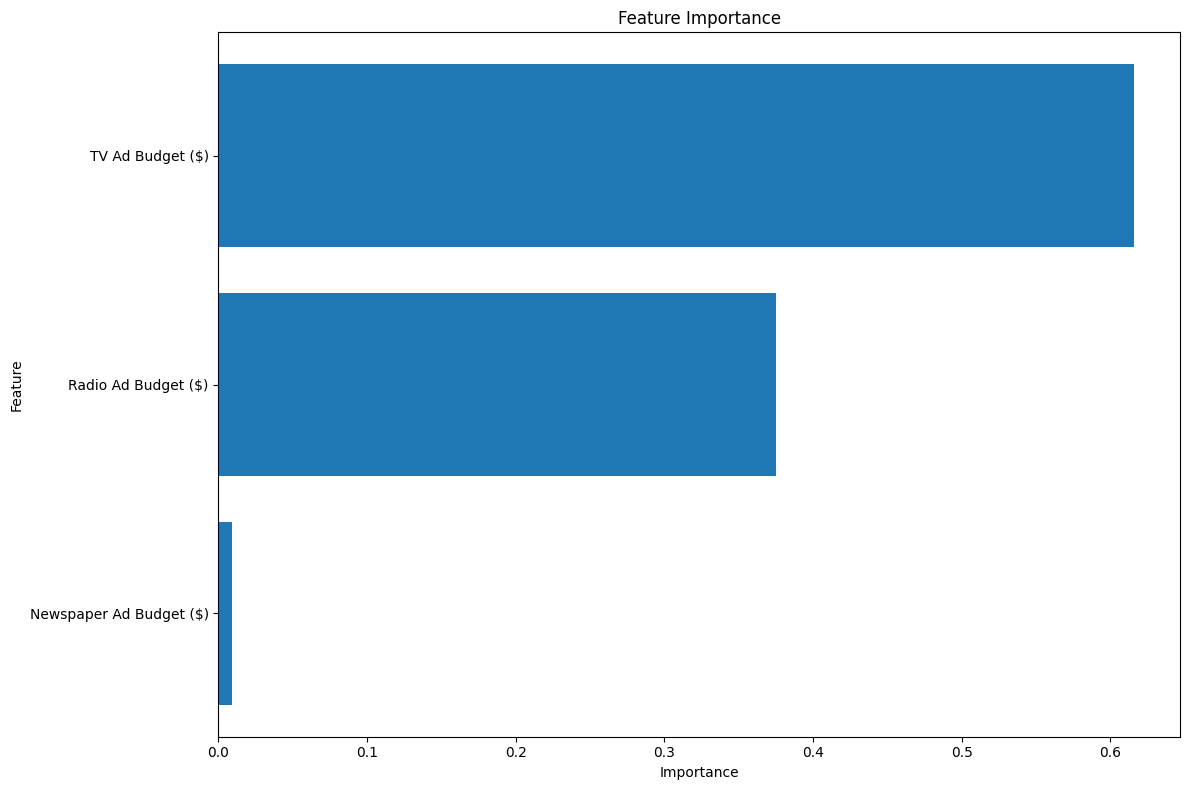

In [ ]:
# 성능이 가장 좋은 랜덤 포레스트의 특성 중요도
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()